# An√°lise Explorat√≥ria de Dados (EDA)

## 1. Importar bibliotecas e carregar os dados pr√©-processados


In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
db_path = os.path.abspath(os.path.join(os.getcwd(), "..", "db"))
if db_path not in sys.path:
    sys.path.append(db_path)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_process import process_data

# Carregar dados diretamente do banco de dados usando o pipeline completo
df = process_data()
df = df.reset_index()  # Garante que 'date' seja uma coluna
# if 'date' in df.columns:
#     df['date'] = pd.to_datetime(df['date'], errors='coerce')  # For√ßa convers√£o correta
df.head()

date  rain_upstream_mean  rain_upstream_max  \
0 2014-01-01 00:00:00+00:00            0.000000                0.0   
1 2014-01-02 00:00:00+00:00            0.004124                0.2   
2 2014-01-03 00:00:00+00:00            0.000000                0.0   
3 2014-01-04 00:00:00+00:00            0.000000                0.0   
4 2014-01-05 00:00:00+00:00            0.000000                0.0   

   rain_upstream_min  rain_upstream_q25  rain_upstream_q75  \
0                0.0                0.0                0.0   
1                0.0                0.0                0.0   
2                0.0                0.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

   flow_upstream_mean  flow_upstream_max  flow_upstream_min  \
0           19.369072               20.1               18.3   
1           20.271134               21.0               19.3   
2           20.906383               22.3               19.3   
3           17.985567               19.8               16.7   
4           15.802128               16.7               15.0   

   flow_upstream_q25  ...  level_after_q75  rain_upstream_acc_2_days  \
0               18.8  ...            291.0                  0.000000   
1               19.8  ...            308.0                  0.004124   
2               19.8  ...            302.0                  0.004124   
3               17.4  ...            280.0                  0.000000   
4               15.5  ...            271.0                  0.000000   

   rain_downstream_acc_2_days  rain_after_acc_2_days  \
0                    0.010309                    0.0   
1                    0.084536                    0.0   
2                    0.082474                    0.0   
3                    0.000000                    0.0   
4                    0.000000                    0.0   

   rain_upstream_acc_3_days  rain_downstream_acc_3_days  \
0                  0.000000                    0.173196   
1                  0.004124                    0.092784   
2                  0.004124                    0.084536   
3                  0.004124                    0.082474   
4                  0.000000                    0.000000   

   rain_after_acc_3_days  date_sin  date_cos  year  
0                    0.0  0.000000  1.000000  2014  
1                    0.0  0.017213  0.999852  2014  
2                    0.0  0.034422  0.999407  2014  
3                    0.0  0.051620  0.998667  2014  
4                    0.0  0.068802  0.997630  2014  

[5 rows x 55 columns]

## 2. Histogramas e S√©ries Temporais

### **Conclus√µes**

- **Chuva:**  
    - Excesso de valores pr√≥ximos de zero.
    - Cauda longa √† direita.
    - Eventos de chuva intensa s√£o raros.
    - Maioria dos registros corresponde a pouca ou nenhuma chuva.

- **N√≠vel:**  
    - Distribui√ß√µes mais sim√©tricas.
    - Concentra√ß√£o em torno da m√©dia.
    - Reflete o n√≠vel normal do rio na maior parte do tempo.

- **Vaz√£o:**  
    - Distribui√ß√£o assim√©trica.
    - Valores baixos ocorrem com mais frequ√™ncia.
    - Valores altos s√£o menos comuns.

<br>

> **Observa√ß√µes e Recomenda√ß√µes:**  
> As distribui√ß√µes apresentam desbalanceamento, especialmente para chuva e vaz√£o.  
> Recomenda-se aplicar t√©cnicas de tratamento de dados para garantir an√°lises mais robustas e evitar poss√≠veis vieses.

In [2]:
def plot_histograms(df, columns, n_cols=3, bins=30, title="Histograms"):
    n_rows = int(np.ceil(len(columns) / n_cols))
    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(5 * n_cols, 4 * n_rows),
        constrained_layout=True,
    )
    fig.suptitle(title, fontsize=18)
    # Ensure axes is always a flat numpy array
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = np.array([axes])
    for i, col in enumerate(columns):
        df[col].hist(ax=axes[i], bins=bins, label=col)
        axes[i].legend()
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)
    plt.show()


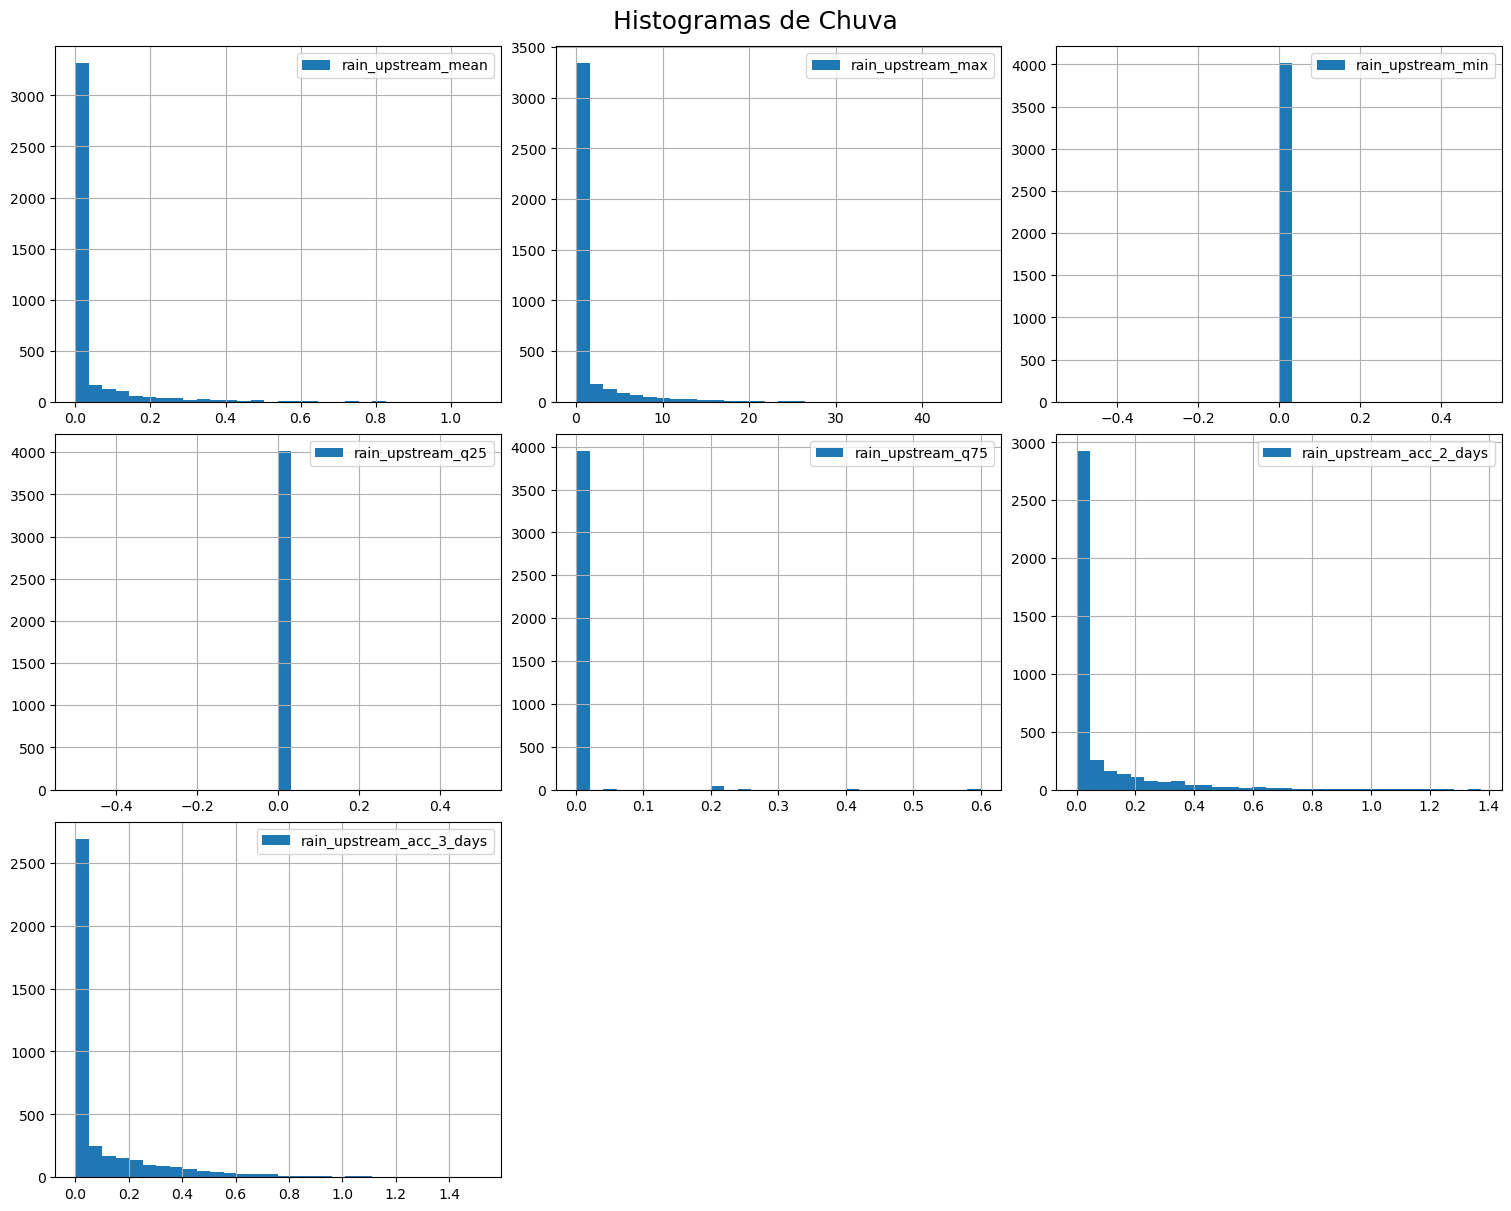

In [3]:

chuva_cols = [col for col in df.columns if col.startswith("rain_upstream")]
plot_histograms(df, chuva_cols, n_cols=3, bins=30, title="Histogramas de Chuva")

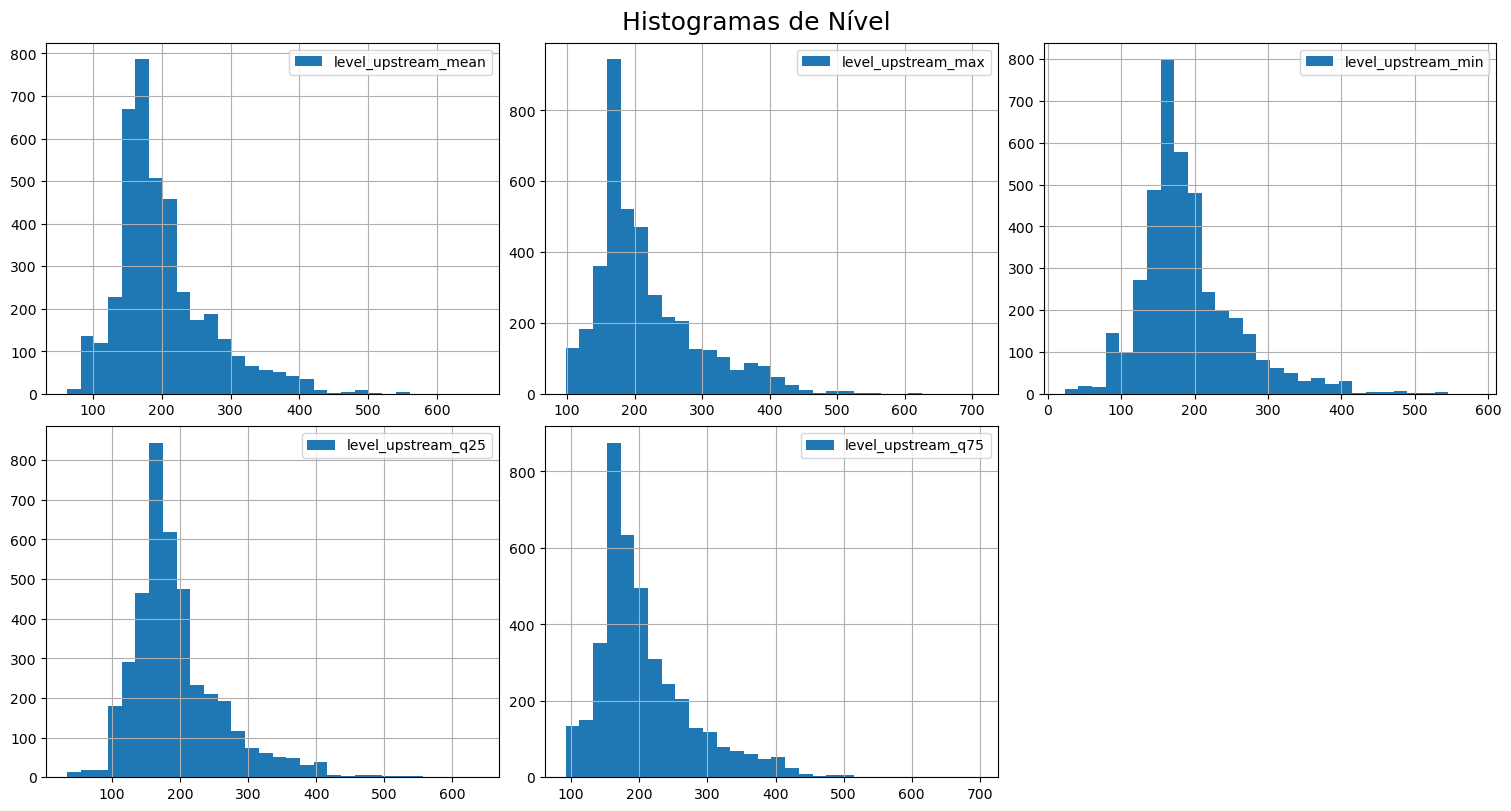

In [4]:
nivel_cols = [col for col in df.columns if col.startswith("level_upstream")]
plot_histograms(df, nivel_cols, n_cols=3, bins=30, title="Histogramas de N√≠vel")

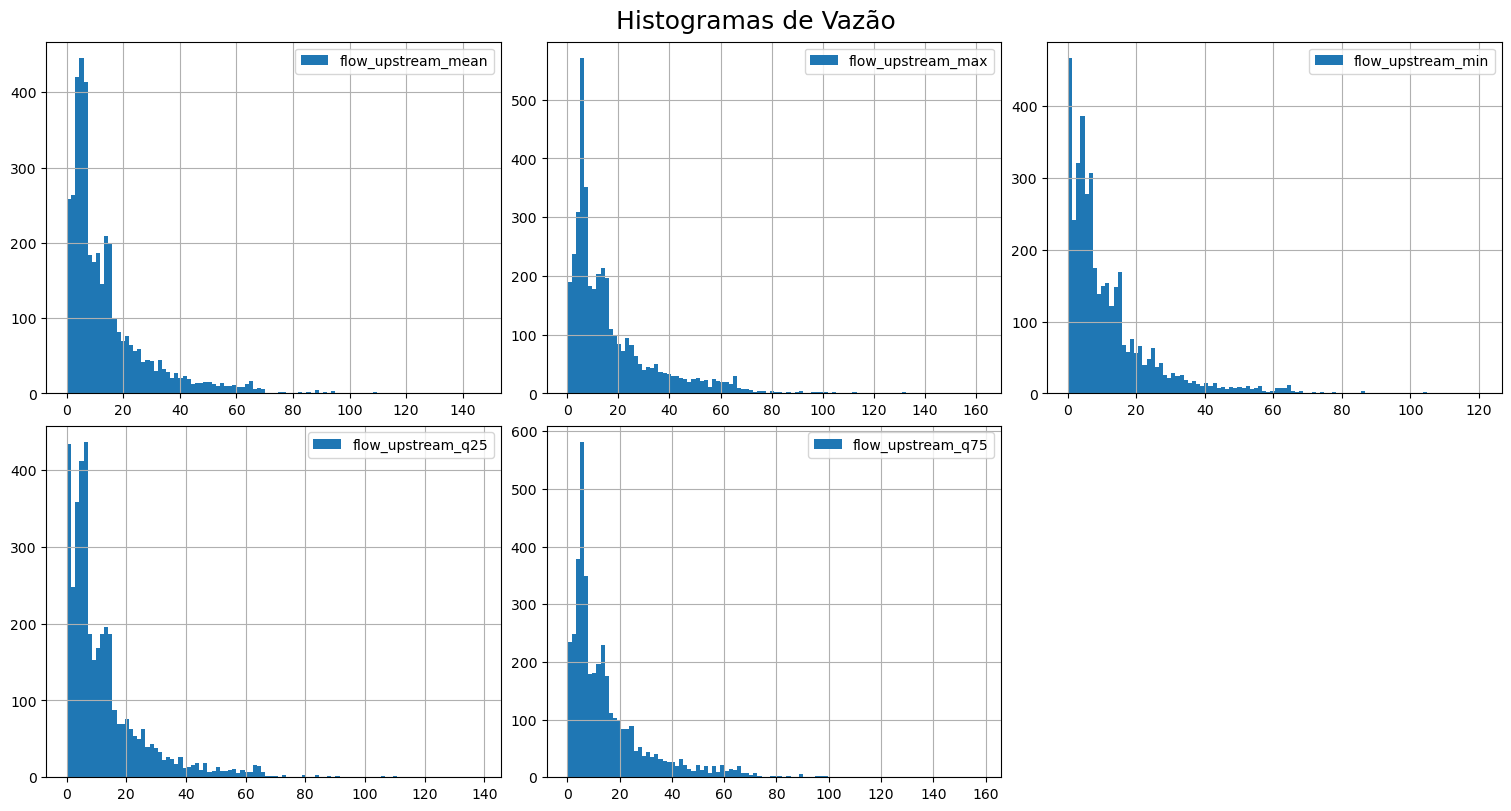

In [5]:
vazao_cols = [col for col in df.columns if "flow_upstream" in col]
plot_histograms(df, vazao_cols, n_cols=3, bins=100, title="Histogramas de Vaz√£o")

### 2.1 Evolu√ß√£o Temporal do N√≠vel do Rio e da Precipita√ß√£o

Visualiza√ß√£o conjunta do comportamento do n√≠vel do rio e da precipita√ß√£o ao longo do tempo. Essa an√°lise permite identificar tend√™ncias sazonais, padr√µes de resposta e poss√≠veis eventos cr√≠ticos.


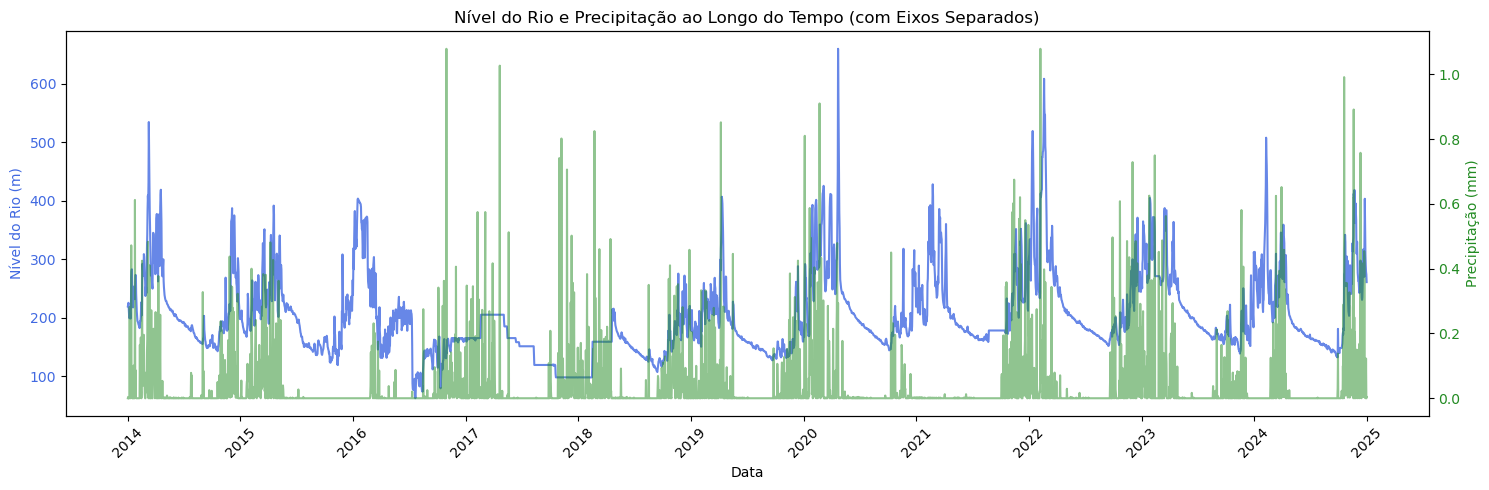

In [6]:
import matplotlib.dates as mdates

# üìà N√≠vel do Rio vs. Precipita√ß√£o com eixos duplos e eixo X formatado
fig, ax1 = plt.subplots(figsize=(15, 5))

# Eixo Y prim√°rio (N√≠vel do Rio)
ax1.plot(df['date'], df['level_upstream_mean'], color='royalblue', label='N√≠vel do Rio (cm)', alpha=0.8)
ax1.set_xlabel("Data")
ax1.set_ylabel("N√≠vel do Rio (m)", color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Eixo Y secund√°rio (Chuva)
ax2 = ax1.twinx()
ax2.plot(df['date'], df['rain_upstream_mean'], color='forestgreen', label='Chuva (mm)', alpha=0.5)
ax2.set_ylabel("Precipita√ß√£o (mm)", color='forestgreen')
ax2.tick_params(axis='y', labelcolor='forestgreen')

# Formata√ß√£o do eixo X (Data)
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Marca por ano
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato: 2014, 2015...
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

plt.title("N√≠vel do Rio e Precipita√ß√£o ao Longo do Tempo (com Eixos Separados)")
fig.tight_layout()
plt.show()


### 2.2 Chuva Acumulada em 2024 com Limiar Cr√≠tico

A partir do hist√≥rico de dados de 2014 a 2024, foi calculado o 95¬∫ percentil da chuva acumulada em 72h, resultando em um **limiar cr√≠tico de aproximadamente 0.52 mm**. Esse valor representa os 5% maiores eventos de chuva acumulada registrados na s√©rie, sendo um indicativo estat√≠stico de risco elevado de enchente.

No gr√°fico abaixo, observamos que v√°rios epis√≥dios entre os meses de **novembro e dezembro de 2024** ultrapassam esse limiar, com destaque para picos superiores a 1.5 mm. Isso sugere que esses per√≠odos concentram os maiores riscos de eventos extremos no ano, refor√ßando a import√¢ncia de estrat√©gias de monitoramento e alerta com base na chuva acumulada.

Esse tipo de an√°lise pode alimentar diretamente o sistema de previs√£o e alerta do HydroGuard, ajudando a definir regras autom√°ticas para disparo de notifica√ß√µes quando esse limiar for atingido ou superado.


Limiar cr√≠tico de chuva acumulada em 72h (95¬∫ percentil): 0.55 mm


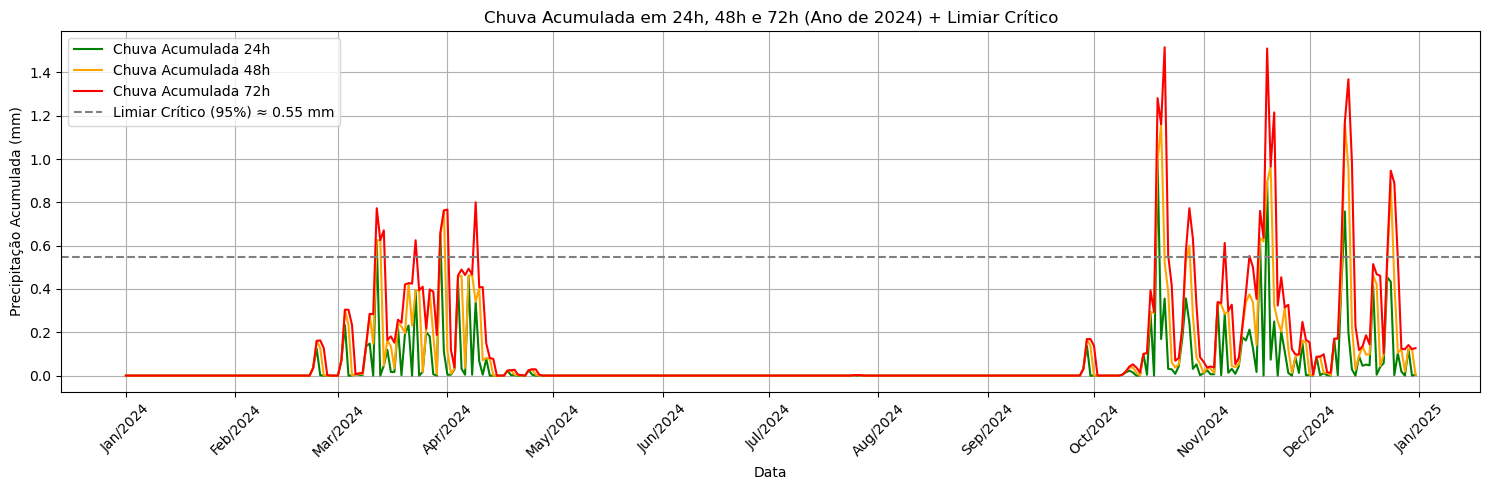

In [7]:
# üåßÔ∏è Filtrar apenas os dados de 2024
df_2024 = df[df['date'].dt.year == 2024]

# üìå Calcular o limiar estat√≠stico (percentil 95 da chuva acumulada em 72h)
limiar_critico = df['rain_upstream_acc_3_days'].quantile(0.95)
print(f"Limiar cr√≠tico de chuva acumulada em 72h (95¬∫ percentil): {limiar_critico:.2f} mm")

# üìä Plot da chuva acumulada com destaque para o limiar cr√≠tico
plt.figure(figsize=(15, 5))
plt.plot(df_2024['date'], df_2024['rain_upstream_mean'], label='Chuva Acumulada 24h', color='green')
plt.plot(df_2024['date'], df_2024['rain_upstream_acc_2_days'], label='Chuva Acumulada 48h', color='orange')
plt.plot(df_2024['date'], df_2024['rain_upstream_acc_3_days'], label='Chuva Acumulada 72h', color='red')

# üß± Linha horizontal indicando o limiar
plt.axhline(y=limiar_critico, color='gray', linestyle='--', label=f'Limiar Cr√≠tico (95%) ‚âà {limiar_critico:.2f} mm')

plt.title("Chuva Acumulada em 24h, 48h e 72h (Ano de 2024) + Limiar Cr√≠tico")
plt.xlabel("Data")
plt.ylabel("Precipita√ß√£o Acumulada (mm)")
plt.legend()
plt.grid(True)

# üóìÔ∏è Eixo X formatado com m√™s e ano
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 3. Boxplots Mensais

### 3.1 N√≠vel do Rio por M√™s

Os boxplots a seguir mostram a distribui√ß√£o do n√≠vel do rio para cada m√™s do ano, permitindo observar padr√µes sazonais e identificar per√≠odos com maior variabilidade ou ocorr√™ncia de outliers.

Essa an√°lise refor√ßa a import√¢ncia de considerar o fator temporal (ex: m√™s ou esta√ß√£o) na modelagem preditiva, uma vez que a din√¢mica do rio muda significativamente ao longo do ano.


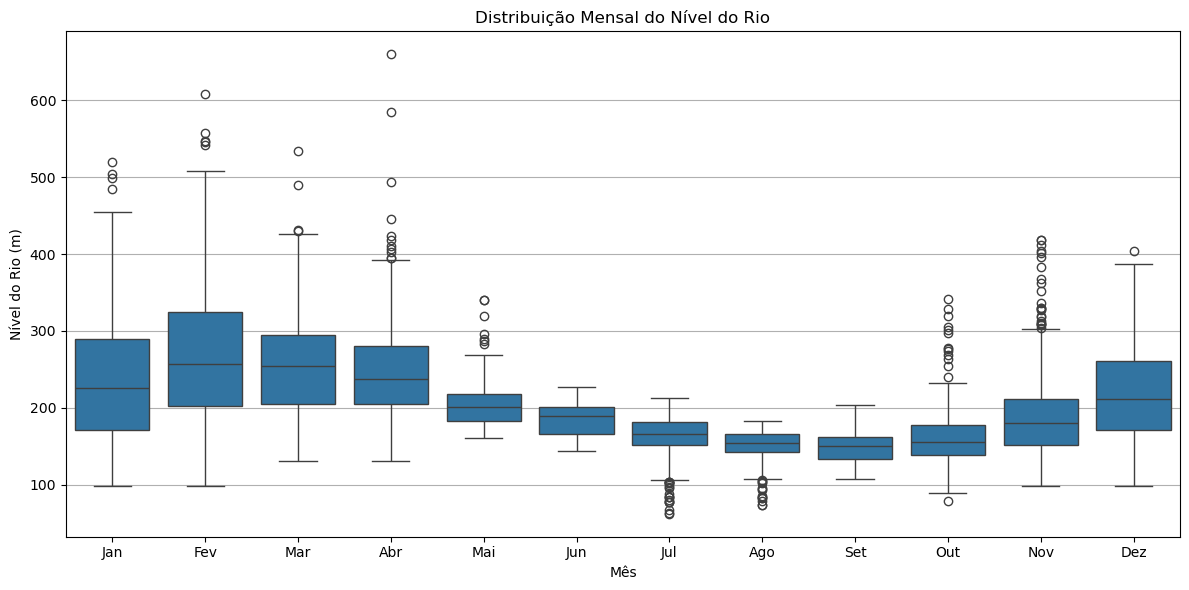

In [8]:
# üìÖ Criar coluna de m√™s
df['month'] = df['date'].dt.month

# üî¢ Mapear nomes dos meses (opcional, deixa mais bonito)
meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
df['mes_nome'] = df['month'].map(meses)

# üì¶ Boxplot do n√≠vel do rio por m√™s
plt.figure(figsize=(12,6))
sns.boxplot(x='mes_nome', y='level_upstream_mean', data=df)
plt.title("Distribui√ß√£o Mensal do N√≠vel do Rio")
plt.xlabel("M√™s")
plt.ylabel("N√≠vel do Rio (m)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 3.2 Precipita√ß√£o por M√™s

O gr√°fico a seguir mostra a distribui√ß√£o da precipita√ß√£o m√©dia di√°ria em cada m√™s, ao longo dos 10 anos da base de dados.

Comparando com o boxplot do n√≠vel do rio, √© poss√≠vel observar a sazonalidade da chuva e como ela se relaciona (ou n√£o) com o comportamento do n√≠vel da √°gua.


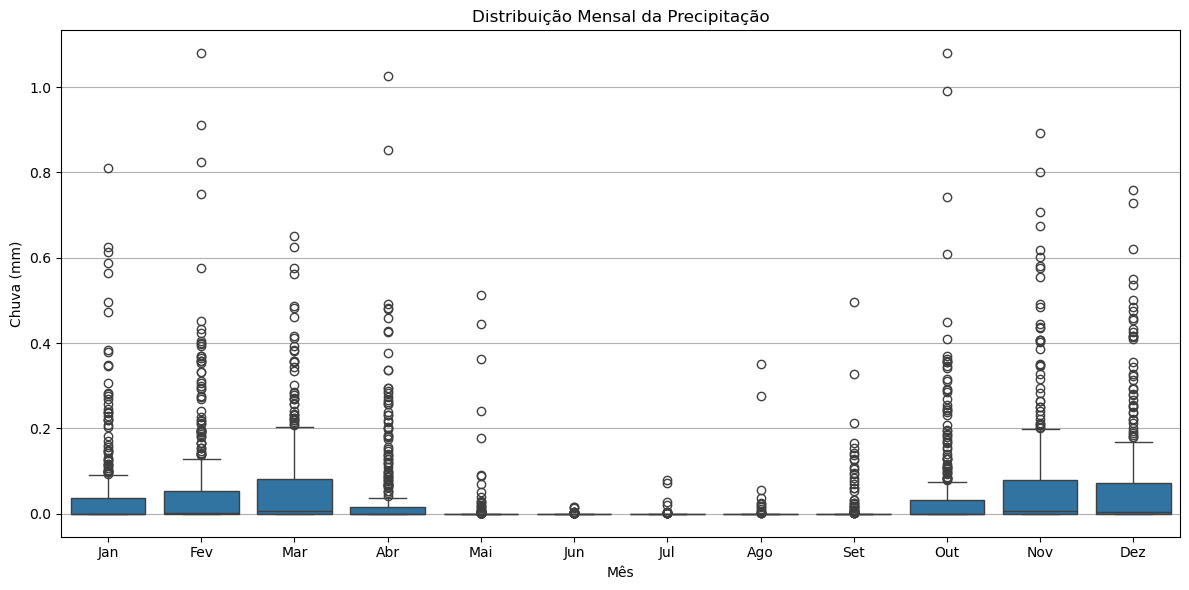

In [9]:
# üì¶ Boxplot da precipita√ß√£o m√©dia por m√™s
plt.figure(figsize=(12,6))
sns.boxplot(x='mes_nome', y='rain_upstream_mean', data=df)
plt.title("Distribui√ß√£o Mensal da Precipita√ß√£o")
plt.xlabel("M√™s")
plt.ylabel("Chuva (mm)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 4. Plotar Correla√ß√µes

**Conclus√µes:**

- **Correla√ß√£o entre vari√°veis:**  
    - Correla√ß√£o fraca entre chuva e n√≠vel.
    - Correla√ß√£o extremamente forte entre n√≠vel e vaz√£o.
    - Correla√ß√£o fraca entre chuva e vaz√£o.

- **Observa√ß√µes e Recomenda√ß√µes:**  
    - A correla√ß√£o entre n√≠vel e vaz√£o √© esperada, pois o n√≠vel do rio afeta diretamente a quantidade de √°gua que flui.
    - Recomenda-se excluir varia√ß√µes de vaz√£o no treinamento do modelo
    - Preferencialmente excluir a vari√°vel vaz√£o do modelo em vez do n√≠vel, porque percebe-se que nos dados da ANA a vaz√£o √© uma vari√°vel ausente em muitas das esta√ß√µes, enquanto o n√≠vel √© uma vari√°vel mais completa.

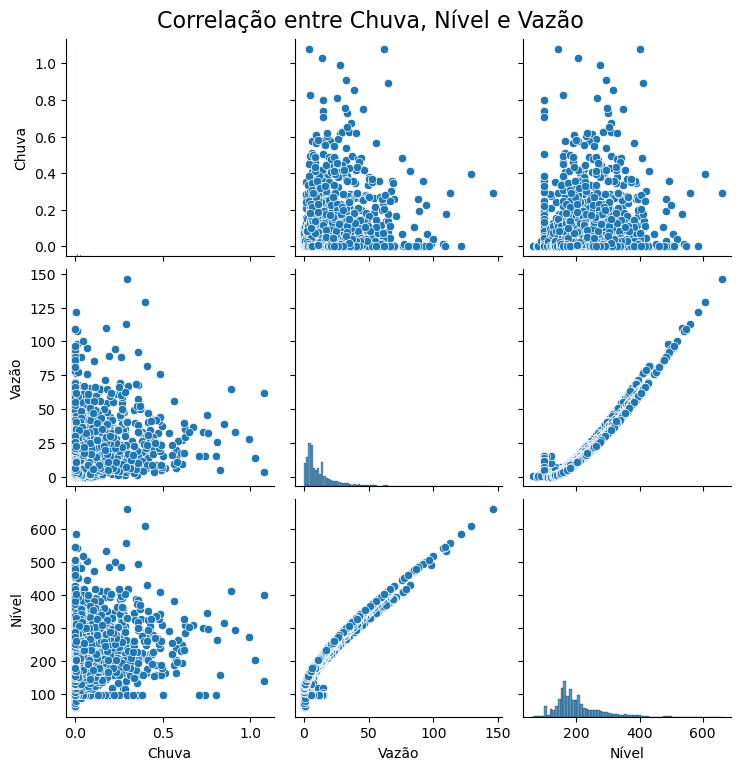

In [10]:
# Seleciona apenas as colunas de m√©dias (apenas upstream)
mean_cols = [col for col in df.columns if "upstream_mean" in col and "acumulada" not in col]

# Mapeia os nomes das colunas para r√≥tulos mais amig√°veis
label_map = {
    "rain_upstream_mean": "Chuva",
    "level_upstream_mean": "N√≠vel",
    "flow_upstream_mean": "Vaz√£o"
}

# Renomeia as colunas para r√≥tulos mais amig√°veis
df_plot = df[mean_cols].rename(columns=label_map)

# Plota o pairplot com os novos r√≥tulos
sns.pairplot(df_plot)
plt.suptitle("Correla√ß√£o entre Chuva, N√≠vel e Vaz√£o", y=1.02, fontsize=16)
plt.show()

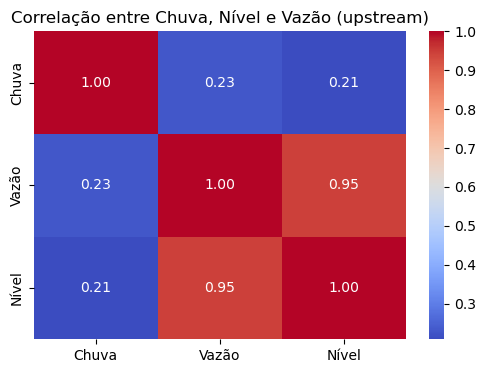

In [11]:
# Calcula a matriz de correla√ß√£o entre as vari√°veis de m√©dia upstream
corr_matrix = df[mean_cols].corr()

# Renomeia as linhas e colunas da matriz de correla√ß√£o
corr_matrix_labeled = corr_matrix.rename(index=label_map, columns=label_map)

# Plota o heatmap de correla√ß√£o com os novos r√≥tulos
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_labeled, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correla√ß√£o entre Chuva, N√≠vel e Vaz√£o (upstream)")
plt.show()

### 4.1 Correla√ß√£o Defasada entre Chuva e N√≠vel do Rio

Para entender o tempo de resposta do rio ap√≥s epis√≥dios de chuva, foi analisada a correla√ß√£o entre a precipita√ß√£o m√©dia di√°ria e o n√≠vel do rio com 1, 2 e 3 dias de atraso.

Observa-se que a correla√ß√£o tende a aumentar levemente com o tempo de defasagem, sugerindo que os efeitos da chuva sobre o n√≠vel do rio n√£o s√£o imediatos, mas se acumulam em at√© dois ou tr√™s dias.

Esse tipo de insight √© essencial para a constru√ß√£o de modelos preditivos baseados em s√©ries temporais.


Correla√ß√£o entre chuva e n√≠vel do rio 1 dias depois: 0.2412
Correla√ß√£o entre chuva e n√≠vel do rio 2 dias depois: 0.2579
Correla√ß√£o entre chuva e n√≠vel do rio 3 dias depois: 0.2527


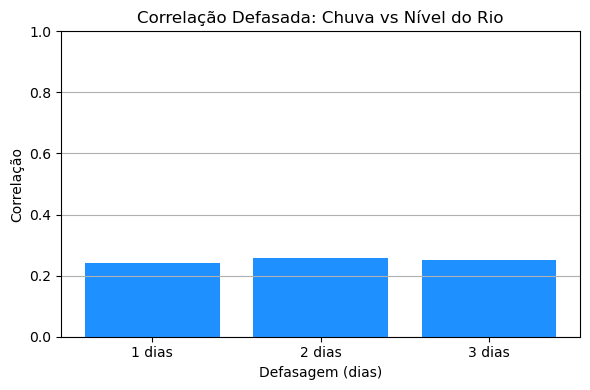

In [12]:
# üìä An√°lise de correla√ß√£o com defasagem (lag)
lags = [1, 2, 3]
correlacoes = {}

# Calcular correla√ß√µes entre chuva e n√≠vel do rio com 1, 2 e 3 dias de atraso
for lag in lags:
    df[f'nivel_lag_{lag}d'] = df['level_upstream_mean'].shift(-lag)
    corr = df[['rain_upstream_mean', f'nivel_lag_{lag}d']].corr().iloc[0,1]
    correlacoes[f'{lag} dias'] = corr

# üìã Exibir os valores de correla√ß√£o no console
for lag, corr in correlacoes.items():
    print(f"Correla√ß√£o entre chuva e n√≠vel do rio {lag} depois: {corr:.4f}")

# üìä Gr√°fico de barras com os resultados
plt.figure(figsize=(6,4))
plt.bar(correlacoes.keys(), correlacoes.values(), color='dodgerblue')
plt.title("Correla√ß√£o Defasada: Chuva vs N√≠vel do Rio")
plt.ylabel("Correla√ß√£o")
plt.xlabel("Defasagem (dias)")
plt.ylim(0, 1)  # ajuste se necess√°rio
plt.grid(axis='y')
plt.tight_layout()
plt.show()
